<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment

#### FAMILIARIZARSE CON EL CONJUNTO DE DATOS

In [8]:
print("Primeras filas del dataset:")
print(boston_df.head())

print("\nInformación del dataset:")
print(boston_df.info())

print("\nEstadísticas descriptivas:")
print(boston_df.describe())

print("\nValores nulos:")
print(boston_df.isnull().sum())


Primeras filas del dataset:
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN   

#### FAMILIARIZARSE CON EL CONJUNTO DE DATOS

#### FAMILIARIZARSE CON EL CONJUNTO DE DATOS

In [12]:
#### GENERAR ESTADÍSTICAS DESCRIPTIVAS Y VISUALIZACIONES

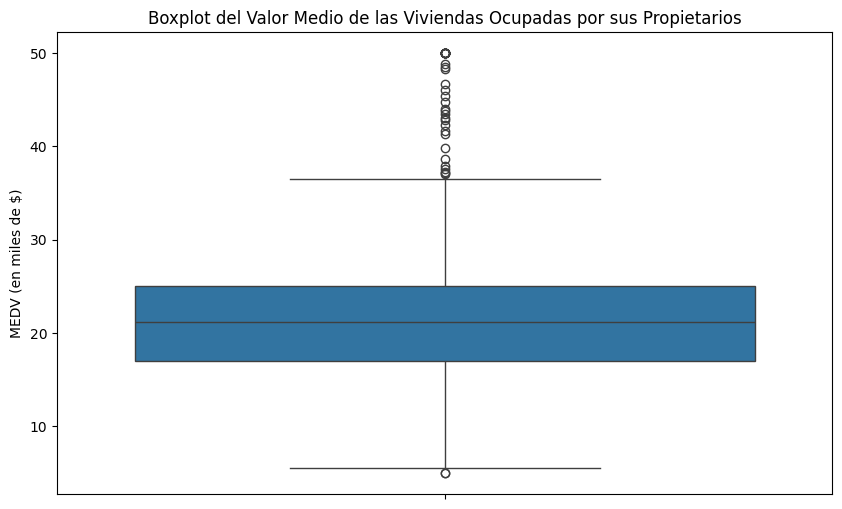


Estadísticas de MEDV:
Media: 22.53
Mediana: 21.20
Desviación estándar: 9.20
Mínimo: 5.00
Máximo: 50.00


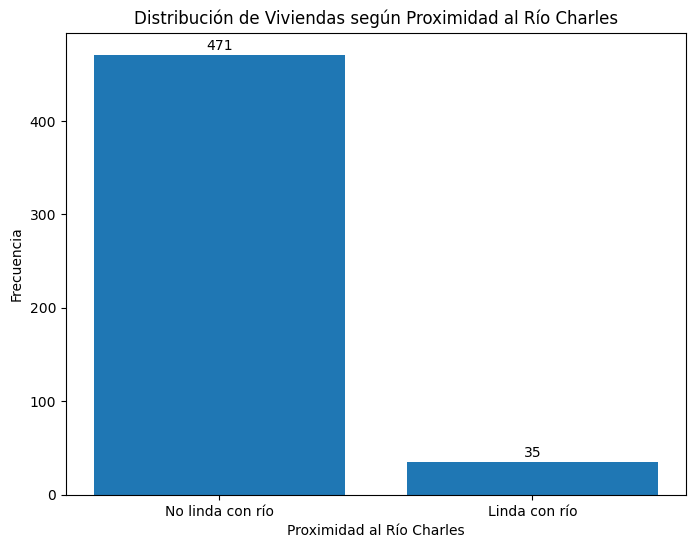


Viviendas que NO lindan con el río: 471
Viviendas que SÍ lindan con el río: 35


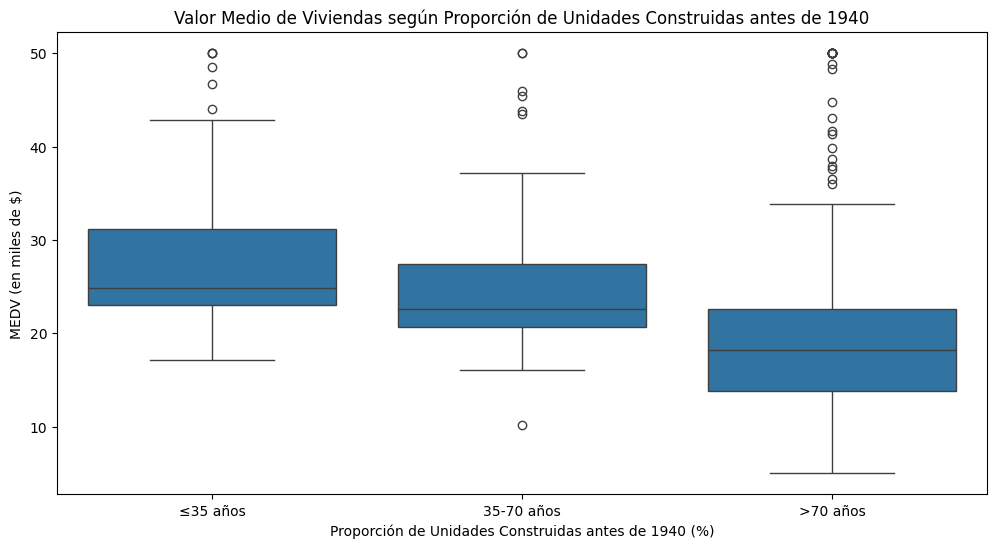


Estadísticas de MEDV por grupo de edad:
            count       mean       std   min     25%   50%     75%   max
AGE_GROUP                                                               
≤35 años     91.0  27.775824  7.638198  17.1  23.050  24.8  31.150  50.0
35-70 años  128.0  24.947656  6.969370  10.2  20.675  22.6  27.425  50.0
>70 años    287.0  19.793380  9.515375   5.0  13.800  18.2  22.550  50.0


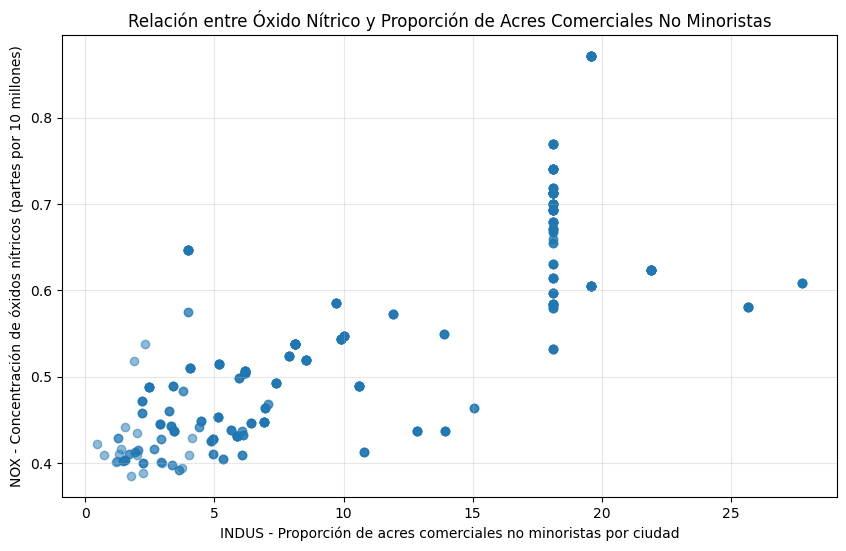


Correlación entre NOX e INDUS: 0.7637


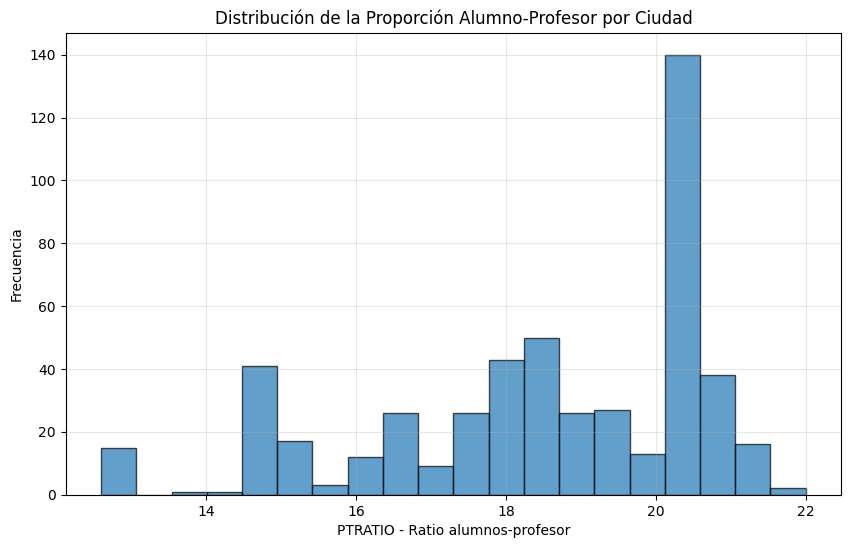


Estadísticas de PTRATIO:
Media: 18.46
Mediana: 19.05
Desviación estándar: 2.16


In [9]:
# 1. Boxplot para MEDV (Valor medio de las viviendas)
pyplot.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Boxplot del Valor Medio de las Viviendas Ocupadas por sus Propietarios')
pyplot.ylabel('MEDV (en miles de $)')
pyplot.show()

print("\nEstadísticas de MEDV:")
print(f"Media: {boston_df['MEDV'].mean():.2f}")
print(f"Mediana: {boston_df['MEDV'].median():.2f}")
print(f"Desviación estándar: {boston_df['MEDV'].std():.2f}")
print(f"Mínimo: {boston_df['MEDV'].min():.2f}")
print(f"Máximo: {boston_df['MEDV'].max():.2f}")

# 2. Diagrama de barras para CHAS (Variable del río Charles)
pyplot.figure(figsize=(8, 6))
chas_counts = boston_df['CHAS'].value_counts()
pyplot.bar(['No linda con río', 'Linda con río'], chas_counts.values)
pyplot.title('Distribución de Viviendas según Proximidad al Río Charles')
pyplot.ylabel('Frecuencia')
pyplot.xlabel('Proximidad al Río Charles')
for i, v in enumerate(chas_counts.values):
    pyplot.text(i, v + 5, str(v), ha='center')
pyplot.show()

print(f"\nViviendas que NO lindan con el río: {chas_counts[0.0]}")
print(f"Viviendas que SÍ lindan con el río: {chas_counts[1.0]}")

# 3. Boxplot de MEDV vs AGE (discretizado en grupos)
# Crear grupos de edad
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], 
                                 bins=[0, 35, 70, 100], 
                                 labels=['≤35 años', '35-70 años', '>70 años'])

pyplot.figure(figsize=(12, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Valor Medio de Viviendas según Proporción de Unidades Construidas antes de 1940')
pyplot.xlabel('Proporción de Unidades Construidas antes de 1940 (%)')
pyplot.ylabel('MEDV (en miles de $)')
pyplot.show()

print("\nEstadísticas de MEDV por grupo de edad:")
print(boston_df.groupby('AGE_GROUP', observed=True)['MEDV'].describe())

# 4. Diagrama de dispersión: NOX vs INDUS
pyplot.figure(figsize=(10, 6))
pyplot.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.5)
pyplot.title('Relación entre Óxido Nítrico y Proporción de Acres Comerciales No Minoristas')
pyplot.xlabel('INDUS - Proporción de acres comerciales no minoristas por ciudad')
pyplot.ylabel('NOX - Concentración de óxidos nítricos (partes por 10 millones)')
pyplot.grid(True, alpha=0.3)
pyplot.show()

correlation = boston_df['NOX'].corr(boston_df['INDUS'])
print(f"\nCorrelación entre NOX e INDUS: {correlation:.4f}")

# 5. Histograma de PTRATIO
pyplot.figure(figsize=(10, 6))
pyplot.hist(boston_df['PTRATIO'], bins=20, edgecolor='black', alpha=0.7)
pyplot.title('Distribución de la Proporción Alumno-Profesor por Ciudad')
pyplot.xlabel('PTRATIO - Ratio alumnos-profesor')
pyplot.ylabel('Frecuencia')
pyplot.grid(True, alpha=0.3)
pyplot.show()

print("\nEstadísticas de PTRATIO:")
print(f"Media: {boston_df['PTRATIO'].mean():.2f}")
print(f"Mediana: {boston_df['PTRATIO'].median():.2f}")
print(f"Desviación estándar: {boston_df['PTRATIO'].std():.2f}")


In [ ]:
#


PRUEBAS ESTADÍSTICAS (α = 0.05)

1. PRUEBA T PARA MUESTRAS INDEPENDIENTES
--------------------------------------------------------------------------------
H0: No existe diferencia significativa en el valor medio de las casas según proximidad al río Charles
H1: Existe diferencia significativa en el valor medio de las casas según proximidad al río Charles
α = 0.05

Estadístico t: -3.9964
Valor p: 0.0001

Media MEDV (No linda con río): 22.09
Media MEDV (Linda con río): 28.44

CONCLUSIÓN: Rechazamos H0. Existe evidencia estadísticamente significativa de que
hay una diferencia en el valor medio de las viviendas según la proximidad al río Charles.


2. ANÁLISIS DE VARIANZA (ANOVA)
--------------------------------------------------------------------------------
H0: No existe diferencia significativa en el valor medio de las casas entre los grupos de edad
H1: Existe diferencia significativa en el valor medio de las casas entre al menos dos grupos de edad
α = 0.05

Estadístico F: 36.4076
Valor

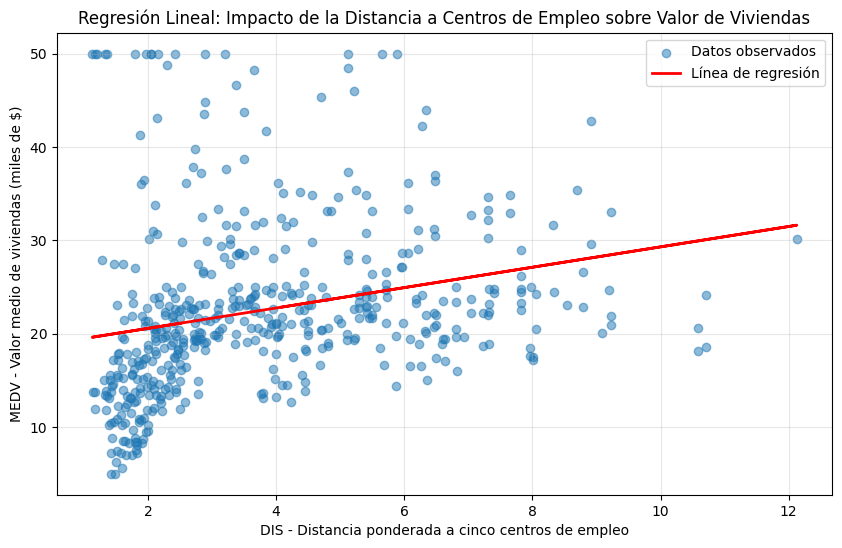


ANÁLISIS COMPLETADO


In [10]:
print("\n" + "="*80)
print("PRUEBAS ESTADÍSTICAS (α = 0.05)")
print("="*80)

# 1. PRUEBA T PARA MUESTRAS INDEPENDIENTES
# ¿Existe diferencia significativa en MEDV según proximidad al río Charles?
print("\n1. PRUEBA T PARA MUESTRAS INDEPENDIENTES")
print("-" * 80)

# Hipótesis
print("H0: No existe diferencia significativa en el valor medio de las casas según proximidad al río Charles")
print("H1: Existe diferencia significativa en el valor medio de las casas según proximidad al río Charles")
print("α = 0.05")

# Separar los datos
chas_no = boston_df[boston_df['CHAS'] == 0.0]['MEDV']
chas_si = boston_df[boston_df['CHAS'] == 1.0]['MEDV']

# Realizar la prueba t
t_statistic, p_value = scipy.stats.ttest_ind(chas_no, chas_si)

print(f"\nEstadístico t: {t_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"\nMedia MEDV (No linda con río): {chas_no.mean():.2f}")
print(f"Media MEDV (Linda con río): {chas_si.mean():.2f}")

if p_value < 0.05:
    print("\nCONCLUSIÓN: Rechazamos H0. Existe evidencia estadísticamente significativa de que")
    print("hay una diferencia en el valor medio de las viviendas según la proximidad al río Charles.")
else:
    print("\nCONCLUSIÓN: No rechazamos H0. No existe evidencia estadísticamente significativa de")
    print("diferencia en el valor medio de las viviendas según la proximidad al río Charles.")

# 2. ANOVA
# ¿Existe diferencia en MEDV entre los grupos de AGE?
print("\n\n2. ANÁLISIS DE VARIANZA (ANOVA)")
print("-" * 80)

print("H0: No existe diferencia significativa en el valor medio de las casas entre los grupos de edad")
print("H1: Existe diferencia significativa en el valor medio de las casas entre al menos dos grupos de edad")
print("α = 0.05")

# Preparar los grupos
age_35 = boston_df[boston_df['AGE_GROUP'] == '≤35 años']['MEDV']
age_35_70 = boston_df[boston_df['AGE_GROUP'] == '35-70 años']['MEDV']
age_70 = boston_df[boston_df['AGE_GROUP'] == '>70 años']['MEDV']

# Realizar ANOVA
f_statistic, p_value_anova = scipy.stats.f_oneway(age_35, age_35_70, age_70)

print(f"\nEstadístico F: {f_statistic:.4f}")
print(f"Valor p: {p_value_anova:.4f}")

print(f"\nMedia MEDV (≤35 años): {age_35.mean():.2f}")
print(f"Media MEDV (35-70 años): {age_35_70.mean():.2f}")
print(f"Media MEDV (>70 años): {age_70.mean():.2f}")

if p_value_anova < 0.05:
    print("\nCONCLUSIÓN: Rechazamos H0. Existe evidencia estadísticamente significativa de que")
    print("hay diferencias en el valor medio de las viviendas entre los grupos de edad de las construcciones.")
else:
    print("\nCONCLUSIÓN: No rechazamos H0. No existe evidencia estadísticamente significativa de")
    print("diferencias en el valor medio de las viviendas entre los grupos de edad.")

# 3. CORRELACIÓN DE PEARSON
# ¿Existe relación entre NOX e INDUS?
print("\n\n3. CORRELACIÓN DE PEARSON")
print("-" * 80)

print("H0: No existe relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales")
print("H1: Existe relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales")
print("α = 0.05")

# Calcular correlación
r_coefficient, p_value_corr = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"\nCoeficiente de correlación (r): {r_coefficient:.4f}")
print(f"Valor p: {p_value_corr:.4f}")

if p_value_corr < 0.05:
    print("\nCONCLUSIÓN: Rechazamos H0. Existe evidencia estadísticamente significativa de una")
    print(f"relación {'positiva' if r_coefficient > 0 else 'negativa'} {'fuerte' if abs(r_coefficient) > 0.7 else 'moderada' if abs(r_coefficient) > 0.5 else 'débil'} entre NOX e INDUS.")
else:
    print("\nCONCLUSIÓN: No rechazamos H0. No podemos concluir que existe relación entre")
    print("las concentraciones de óxido nítrico y la proporción de acres comerciales.")

# 4. ANÁLISIS DE REGRESIÓN LINEAL
# ¿Cuál es el impacto de DIS sobre MEDV?
print("\n\n4. ANÁLISIS DE REGRESIÓN LINEAL")
print("-" * 80)

print("H0: No existe relación lineal entre DIS y MEDV (β1 = 0)")
print("H1: Existe relación lineal entre DIS y MEDV (β1 ≠ 0)")
print("α = 0.05")

# Preparar datos para regresión
X = boston_df['DIS']
X = sm.add_constant(X)  # Añadir intercepto
y = boston_df['MEDV']

# Ajustar modelo
model = sm.OLS(y, X).fit()

# Mostrar resultados
print("\n" + str(model.summary()))

# Extraer coeficientes
coef_dis = model.params['DIS']
p_value_dis = model.pvalues['DIS']
r_squared = model.rsquared

print(f"\nCoeficiente de DIS: {coef_dis:.4f}")
print(f"Valor p: {p_value_dis:.4f}")
print(f"R²: {r_squared:.4f}")

if p_value_dis < 0.05:
    print("\nCONCLUSIÓN: Rechazamos H0. La distancia ponderada a los centros de empleo tiene")
    print(f"un impacto estadísticamente significativo sobre el valor medio de las viviendas.")
    print(f"Por cada unidad adicional de distancia, el valor medio cambia en {coef_dis:.2f} miles de dólares.")
else:
    print("\nCONCLUSIÓN: No rechazamos H0. No existe evidencia estadísticamente significativa")
    print("de que la distancia a los centros de empleo impacte el valor medio de las viviendas.")

# Gráfico de regresión
pyplot.figure(figsize=(10, 6))
pyplot.scatter(boston_df['DIS'], boston_df['MEDV'], alpha=0.5, label='Datos observados')
pyplot.plot(boston_df['DIS'], model.predict(X), color='red', linewidth=2, label='Línea de regresión')
pyplot.title('Regresión Lineal: Impacto de la Distancia a Centros de Empleo sobre Valor de Viviendas')
pyplot.xlabel('DIS - Distancia ponderada a cinco centros de empleo')
pyplot.ylabel('MEDV - Valor medio de viviendas (miles de $)')
pyplot.legend()
pyplot.grid(True, alpha=0.3)
pyplot.show()

print("\n" + "="*80)
print("ANÁLISIS COMPLETADO")
print("="*80)